In [4]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_f76289e593f5413f86c4a094f73ac29e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='3VUwgeoz3_iguVPmEyE3xAWBwP73j-JPmghM55Gmu-WB',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_f76289e593f5413f86c4a094f73ac29e.get_object(Bucket='pythonbasics-donotdelete-pr-2hpsto80vyytv3',Key='quarter_csv (1).csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_1 = pd.read_csv(body)
df_data_1.head()


,date,level-current,level-chained,change-current,change-chained
0,1947-04-01,246.3,1932.3,6.4,-0.4
1,1947-07-01,250.1,1930.3,17.3,6.4
2,1947-10-01,260.3,1960.7,9.3,6.0
3,1948-01-01,266.2,1989.5,10.5,6.7
4,1948-04-01,272.9,2021.9,10.0,2.3


In [5]:

body = client_f76289e593f5413f86c4a094f73ac29e.get_object(Bucket='pythonbasics-donotdelete-pr-2hpsto80vyytv3',Key='aat1_csv.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_2 = pd.read_csv(body)
df_data_2.head()


,year,population,labor_force,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor,footnotes
0,1941,99900,55910,56.0,50350,50.4,9100,41250,5560,9.9,43990,NaN
1,1942,98640,56410,57.2,53750,54.5,9250,44500,2660,4.7,42230,NaN
2,1943,94640,55540,58.7,54470,57.6,9080,45390,1070,1.9,39100,NaN
3,1944,93220,54630,58.6,53960,57.9,8950,45010,670,1.2,38590,NaN
4,1945,94090,53860,57.2,52820,56.1,8580,44240,1040,1.9,40230,NaN


In [6]:
df_data_2[df_data_2['unemployed_percent'] > 8.5]

,year,population,labor_force,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor,footnotes
0,1941,99900,55910,56.0,50350,50.4,9100,41250,5560,9.9,43990,NaN
42,1982,172271,110204,64.0,99526,57.8,3401,96125,10678,9.7,62067,NaN
43,1983,174215,111550,64.0,100834,57.9,3383,97450,10717,9.6,62665,NaN
69,2009,235801,154142,65.4,139877,59.3,2103,137775,14265,9.3,81659,1.0
70,2010,237830,153889,64.7,139064,58.5,2206,136858,14825,9.6,83941,1.0


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def make_dashboard():
    plt.plot(df_data_2['year'],df_data_2['unemployed_percent'],'b')
    plt.plot(df_data_1['date'],df_data_1['change-chained'],'r')

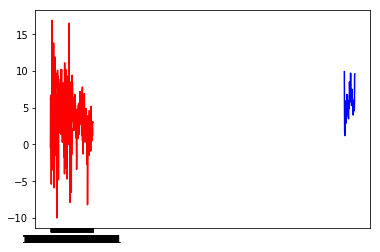

In [9]:
make_dashboard()